In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [172]:
from requests.exceptions import Timeout
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100

reviews = []
stars = []
date = []
country = []
seatType = []
# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize=100"
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    response = requests.get(url,headers=headers,timeout=25)
        # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for item in parsed_content.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in parsed_content.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in parsed_content.find_all("time"):
        date.append(item.text)
        
    #country
    for item in parsed_content.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))
    #SeatType
    for item in parsed_content.find_all('td',class_="review-rating-header cabin_flown"):
        try:
            seatType.append(item.find_next_sibling('td').text.strip())
        except:
            print(f"Error on page {i}")
            seatType.append("None")

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30


In [173]:
print(f'reviews:{len(reviews)},stars:{len(stars)},date:{len(date)},country:{len(country)},seatType:{len(seatType)}')

reviews:3000,stars:3030,date:3000,country:3000,seatType:3000


In [174]:
stars = [star for star in stars if star!= '\n\t\t\t\t\t\t\t\t\t\t\t\t5']

In [175]:
print(f'reviews:{len(reviews)},stars:{len(stars)},date:{len(date)},country:{len(country)},seatType:{len(seatType)}')

reviews:3000,stars:3000,date:3000,country:3000,seatType:3000


In [176]:
dataBA={'reviews':reviews,'stars':stars,'date':date,'country':country,'seatType':seatType}

In [177]:
df = pd.DataFrame(dataBA)
df.head()

,reviews,stars,date,country,seatType
0,Not Verified | BA business class in Europe h...,4,6th October 2024,United Kingdom,Business Class
1,✅ Trip Verified | Our flight started in Seattl...,1,5th October 2024,United States,Economy Class
2,✅ Trip Verified | British Airways Flight fro...,4,4th October 2024,India,Economy Class
3,✅ Trip Verified | British Airways World Trav...,5,28th September 2024,United Kingdom,Premium Economy
4,✅ Trip Verified | BA is barely a step above ...,2,25th September 2024,United Kingdom,Economy Class


In [178]:
filePath = r''
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

DATA CLEANING


In [3]:
df = pd.read_csv('BA_reviews.csv')

In [4]:
review_df = df['reviews'] = df['reviews'].str.replace('✅', '').str.replace('❎', '')
review_df = df['reviews'].str.split('|').apply(pd.Series)
review_df.columns=['Verification_Status','Reviews']
review_df.head()

,Verification_Status,Reviews
0,Not Verified,BA business class in Europe has a seat the ...
1,Trip Verified,Our flight started in Seattle Wa heading to L...
2,Trip Verified,British Airways Flight from Edinburgh got d...
3,Trip Verified,British Airways World Traveller Plus (Premi...
4,Trip Verified,BA is barely a step above low cost airlines...


In [5]:
df = pd.concat([df,review_df],axis=1)
df.head()

,Unnamed: 0,reviews,stars,date,country,seatType,Verification_Status,Reviews
0,0,Not Verified | BA business class in Europe h...,4,6th October 2024,United Kingdom,Business Class,Not Verified,BA business class in Europe has a seat the ...
1,1,Trip Verified | Our flight started in Seattle...,1,5th October 2024,United States,Economy Class,Trip Verified,Our flight started in Seattle Wa heading to L...
2,2,Trip Verified | British Airways Flight from...,4,4th October 2024,India,Economy Class,Trip Verified,British Airways Flight from Edinburgh got d...
3,3,Trip Verified | British Airways World Trave...,5,28th September 2024,United Kingdom,Premium Economy,Trip Verified,British Airways World Traveller Plus (Premi...
4,4,Trip Verified | BA is barely a step above l...,2,25th September 2024,United Kingdom,Economy Class,Trip Verified,BA is barely a step above low cost airlines...


In [6]:
df.drop(columns='reviews',inplace=True)
df.head()

,Unnamed: 0,stars,date,country,seatType,Verification_Status,Reviews
0,0,4,6th October 2024,United Kingdom,Business Class,Not Verified,BA business class in Europe has a seat the ...
1,1,1,5th October 2024,United States,Economy Class,Trip Verified,Our flight started in Seattle Wa heading to L...
2,2,4,4th October 2024,India,Economy Class,Trip Verified,British Airways Flight from Edinburgh got d...
3,3,5,28th September 2024,United Kingdom,Premium Economy,Trip Verified,British Airways World Traveller Plus (Premi...
4,4,2,25th September 2024,United Kingdom,Economy Class,Trip Verified,BA is barely a step above low cost airlines...


In [7]:
df['Reviews'] = df['Reviews'].astype(str)

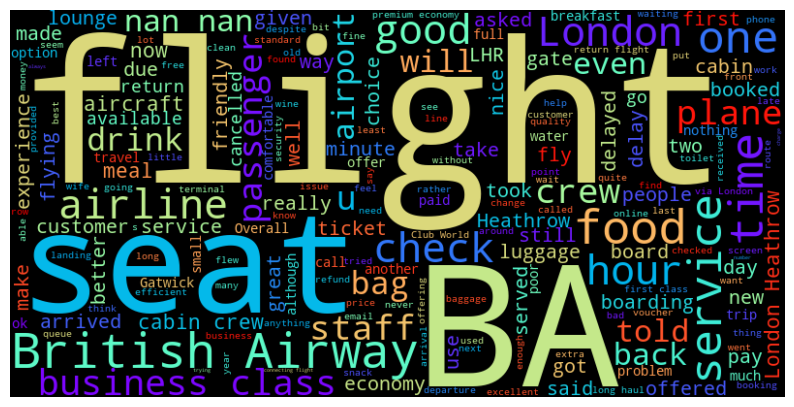

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Example text

# Generate a word cloud with custom options
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      colormap='rainbow',
                      stopwords=STOPWORDS,  # Remove common stop words
                      max_words=200).generate(' '.join(df['Reviews']))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vineetjujjavarapu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
# Initialize the SentimentIntensityAnalyzer (with parentheses)
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on a sentence
score = sia.polarity_scores("the food is excellent")
print(score)

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}


In [11]:
def analyze_sentiment(text):
    return sia.polarity_scores(text)

df['sentiment_scores'] = df['Reviews'].apply(analyze_sentiment)
df_sentiment = df['sentiment_scores'].apply(pd.Series)
df_sentiment.head()


,neg,neu,pos,compound
0,0.072,0.874,0.054,-0.3326
1,0.027,0.940,0.033,0.6474
2,0.104,0.849,0.046,-0.7184
3,0.036,0.729,0.234,0.9747
4,0.161,0.839,0.000,-0.7246


In [12]:
df = pd.concat( [df,df_sentiment],axis = 1)


In [13]:
df.drop('sentiment_scores',inplace=True,axis = 1)


In [14]:
df.head()

,Unnamed: 0,stars,date,country,seatType,Verification_Status,Reviews,neg,neu,pos,compound
0,0,4,6th October 2024,United Kingdom,Business Class,Not Verified,BA business class in Europe has a seat the ...,0.072,0.874,0.054,-0.3326
1,1,1,5th October 2024,United States,Economy Class,Trip Verified,Our flight started in Seattle Wa heading to L...,0.027,0.940,0.033,0.6474
2,2,4,4th October 2024,India,Economy Class,Trip Verified,British Airways Flight from Edinburgh got d...,0.104,0.849,0.046,-0.7184
3,3,5,28th September 2024,United Kingdom,Premium Economy,Trip Verified,British Airways World Traveller Plus (Premi...,0.036,0.729,0.234,0.9747
4,4,2,25th September 2024,United Kingdom,Economy Class,Trip Verified,BA is barely a step above low cost airlines...,0.161,0.839,0.000,-0.7246


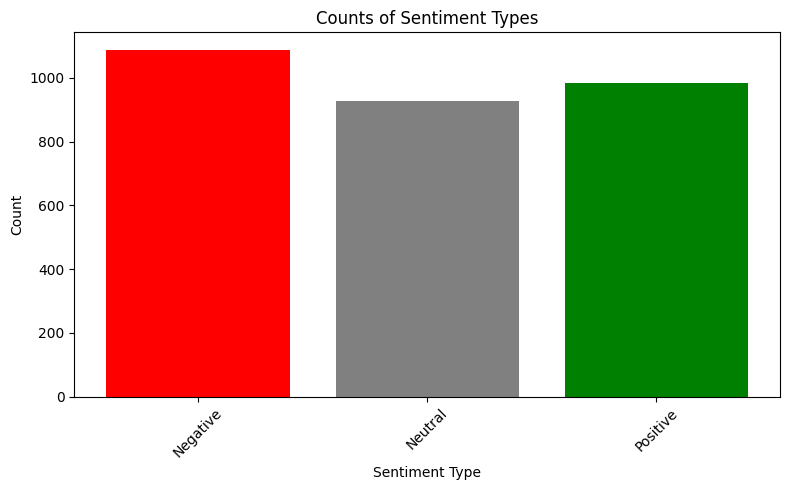

In [15]:
counts = {
    'Negative': (df['compound'] > 0.35).sum(),
    'Neutral': ((df['compound']<=0.35) & (df['compound']>=-0.35)).sum(),
    'Positive': (df['compound'] < -0.35).sum()
}

counts_df = pd.DataFrame(list(counts.items()), columns=['Sentiment', 'Count'])

plt.figure(figsize=(8, 5))
plt.bar(counts_df['Sentiment'], counts_df['Count'], color=['red', 'gray', 'green'])

plt.title('Counts of Sentiment Types')
plt.ylabel('Count')
plt.xlabel('Sentiment Type')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

WORD FREQUENCY

1) Combined

2) Positive

3) Neutral

4) Negative

In [16]:
from collections import Counter
import re

In [17]:
def count_freq(df):
    additional_stopwords = set(STOPWORDS).union({'the', 'has', 'a', 'in', 'to', 'from', 'is', 'and', 'for', 'but', 'at', 'of', 'that', 'with', 'this', 'are', 'by', 'was', 'on', 'as', 'not', 'or', 'it', 'an','ba','flight','british','airways','t','s'})

    all_reviews = ' '.join(df['Reviews'])

    words = re.findall(r'\b\w+\b', all_reviews.lower())

    words = [word for word in words if word not in additional_stopwords]

    word_frequency = Counter(words)
    word_freq_df_combined = pd.DataFrame(word_frequency.items(),columns=['Words','Frequency'])
    word_freq_df_combined = word_freq_df_combined.sort_values(by='Frequency',ascending=False)
    return word_freq_df_combined.head(25)

In [18]:
df_combined = count_freq(df)
df_pos = count_freq(df[df['compound']>0.35])
df_neg = count_freq(df[df['compound']<-0.35])
df_neutral = count_freq(df[(df['compound']>=-0.35) & (df['compound']<=0.35)])


In [19]:
def plot_word_freq(df,split_type):
    plt.figure(10,6)
    df.plot(kind='bar',x='Frequency',y='Words')
    plt.title(f'{split_type} Words Frequency in Reviews')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.show()  

In [20]:
df_combined.head()

,Words,Frequency
185,service,1893
313,london,1676
3,seat,1394
317,food,1361
111,time,1321


<Figure size 1200x600 with 0 Axes>

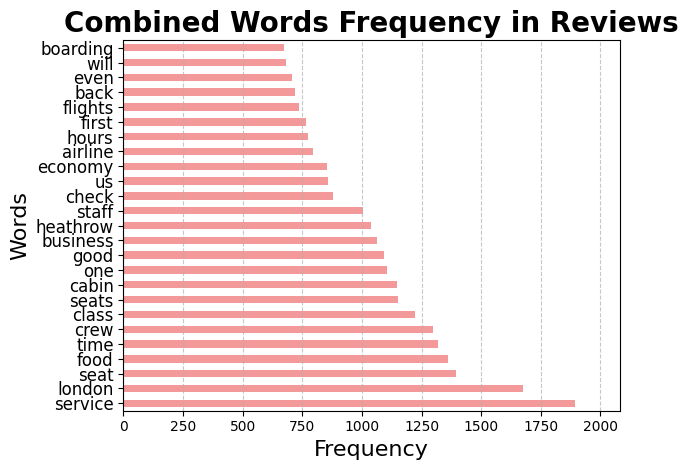

<Figure size 1200x600 with 0 Axes>

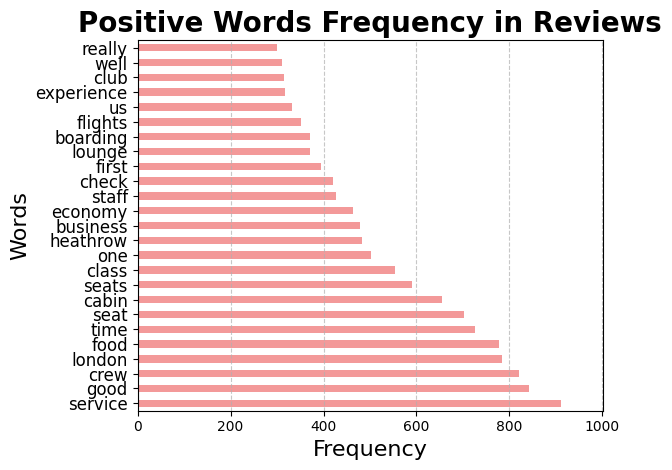

<Figure size 1200x600 with 0 Axes>

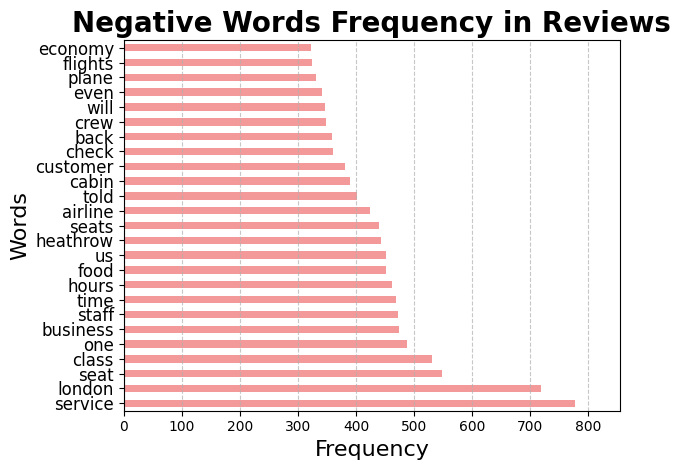

<Figure size 1200x600 with 0 Axes>

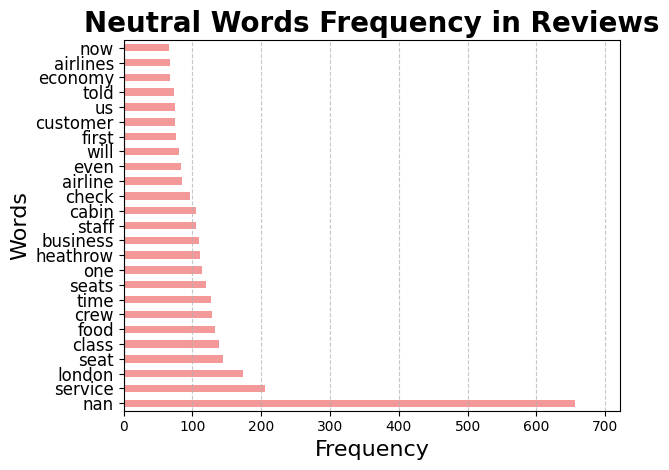

In [21]:
def plot_word_freq(df, split_type):
    plt.figure(figsize=(12, 6))  # Adjusted figure size for better readability
    ax = df.plot(kind='barh', x='Words', y='Frequency', legend=False, color='lightcoral', alpha=0.8)
    
    # Set titles and labels with improved font sizes
    plt.title(f'{split_type} Words Frequency in Reviews', fontsize=20, fontweight='bold')
    plt.xlabel('Frequency', fontsize=16)
    plt.ylabel('Words', fontsize=16)

    # Rotate y-axis labels
    ax.set_yticklabels(df['Words'], rotation=0, fontsize=12)  # No rotation for better readability

    # Set limits for x-axis to shift it if needed
    ax.set_xlim(0, df['Frequency'].max() * 1.1)  # Shift x-axis slightly above max value

    # Add gridlines for better readability
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

# Example usage
plot_word_freq(df_combined, 'Combined')
plot_word_freq(df_pos, 'Positive')
plot_word_freq(df_neg, 'Negative')
plot_word_freq(df_neutral, 'Neutral')

In [22]:
df.head()

,Unnamed: 0,stars,date,country,seatType,Verification_Status,Reviews,neg,neu,pos,compound
0,0,4,6th October 2024,United Kingdom,Business Class,Not Verified,BA business class in Europe has a seat the ...,0.072,0.874,0.054,-0.3326
1,1,1,5th October 2024,United States,Economy Class,Trip Verified,Our flight started in Seattle Wa heading to L...,0.027,0.940,0.033,0.6474
2,2,4,4th October 2024,India,Economy Class,Trip Verified,British Airways Flight from Edinburgh got d...,0.104,0.849,0.046,-0.7184
3,3,5,28th September 2024,United Kingdom,Premium Economy,Trip Verified,British Airways World Traveller Plus (Premi...,0.036,0.729,0.234,0.9747
4,4,2,25th September 2024,United Kingdom,Economy Class,Trip Verified,BA is barely a step above low cost airlines...,0.161,0.839,0.000,-0.7246


In [23]:
df['stars'] = df['stars'].astype(int)
stars_avg = df['stars'].mean()
stars_avg

np.float64(4.355333333333333)

In [24]:
df['seatType'].value_counts()

seatType
Economy Class      1634
Business Class      925
Premium Economy     286
First Class         155
Name: count, dtype: int64

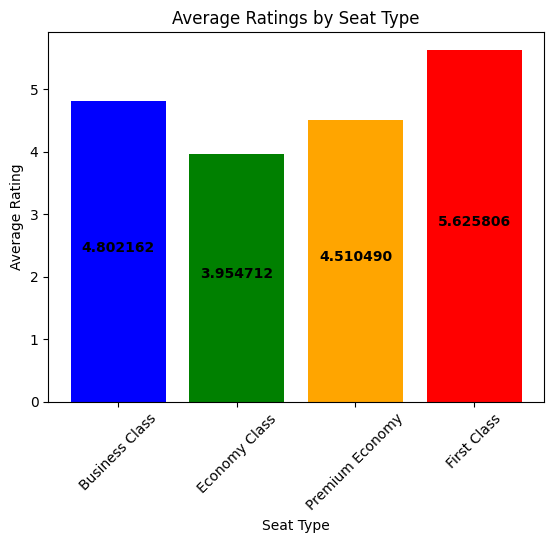

In [25]:
def Avg_rating_by_seatType(typeOfSeat):
    return df[df['seatType'] == typeOfSeat]['stars'].astype(int).mean()

BC_avg = Avg_rating_by_seatType('Business Class')
EC_avg = Avg_rating_by_seatType('Economy Class')
PE_avg = Avg_rating_by_seatType('Premium Economy')
FC_avg = Avg_rating_by_seatType('First Class')

avg_ratings = {
    'Business Class': BC_avg,
    'Economy Class': EC_avg,
    'Premium Economy': PE_avg,
    'First Class': FC_avg
}

# Create a bar chart
seat_types = list(avg_ratings.keys())
ratings = list(avg_ratings.values())

plt.bar(seat_types, ratings, color=['blue', 'green', 'orange', 'red'])

plt.xlabel('Seat Type')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Seat Type')

for i,v in enumerate(ratings):
    plt.text(i,v/2,f'{v:2f}',ha='center',fontweight='bold')
plt.xticks(rotation=45)

plt.show()

In [26]:
df.head()

,Unnamed: 0,stars,date,country,seatType,Verification_Status,Reviews,neg,neu,pos,compound
0,0,4,6th October 2024,United Kingdom,Business Class,Not Verified,BA business class in Europe has a seat the ...,0.072,0.874,0.054,-0.3326
1,1,1,5th October 2024,United States,Economy Class,Trip Verified,Our flight started in Seattle Wa heading to L...,0.027,0.940,0.033,0.6474
2,2,4,4th October 2024,India,Economy Class,Trip Verified,British Airways Flight from Edinburgh got d...,0.104,0.849,0.046,-0.7184
3,3,5,28th September 2024,United Kingdom,Premium Economy,Trip Verified,British Airways World Traveller Plus (Premi...,0.036,0.729,0.234,0.9747
4,4,2,25th September 2024,United Kingdom,Economy Class,Trip Verified,BA is barely a step above low cost airlines...,0.161,0.839,0.000,-0.7246


In [27]:
# Remove ordinal suffixes
df['date'] = df['date'].str.replace(r'\b(\d+)(st|nd|rd|th)\b', r'\1', regex=True)
df['date'] = pd.to_datetime(df['date'], format='%d %B %Y', errors='coerce')
df.head()

,Unnamed: 0,stars,date,country,seatType,Verification_Status,Reviews,neg,neu,pos,compound
0,0,4,2024-10-06,United Kingdom,Business Class,Not Verified,BA business class in Europe has a seat the ...,0.072,0.874,0.054,-0.3326
1,1,1,2024-10-05,United States,Economy Class,Trip Verified,Our flight started in Seattle Wa heading to L...,0.027,0.940,0.033,0.6474
2,2,4,2024-10-04,India,Economy Class,Trip Verified,British Airways Flight from Edinburgh got d...,0.104,0.849,0.046,-0.7184
3,3,5,2024-09-28,United Kingdom,Premium Economy,Trip Verified,British Airways World Traveller Plus (Premi...,0.036,0.729,0.234,0.9747
4,4,2,2024-09-25,United Kingdom,Economy Class,Trip Verified,BA is barely a step above low cost airlines...,0.161,0.839,0.000,-0.7246


In [35]:
df['year'] = df['date'].dt.year
yearly_avg = df.groupby('year')['stars'].mean()
yearly_avg

year
2015    5.045326
2016    4.985965
2017    3.847902
2018    4.317901
2019    4.764045
2020    4.336538
2021    4.298851
2022    3.995305
2023    3.350000
2024    3.780142
Name: stars, dtype: float64

Text(0, 0.5, 'Rating')

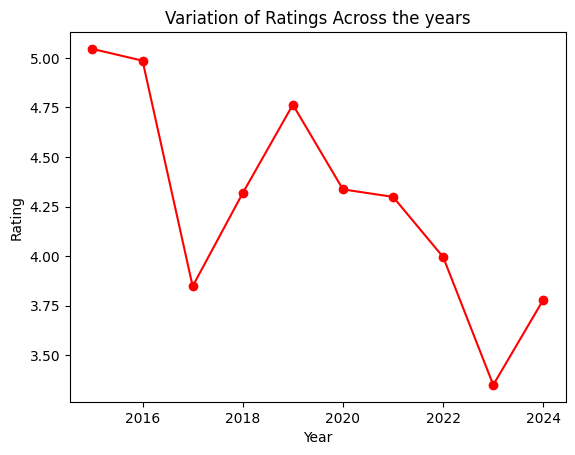

In [39]:
yearly_avg.plot(kind='line',marker='o',color='r')
plt.title('Variation of Ratings Across the years')
plt.xlabel('Year')
plt.ylabel('Rating')

<Figure size 800x500 with 0 Axes>

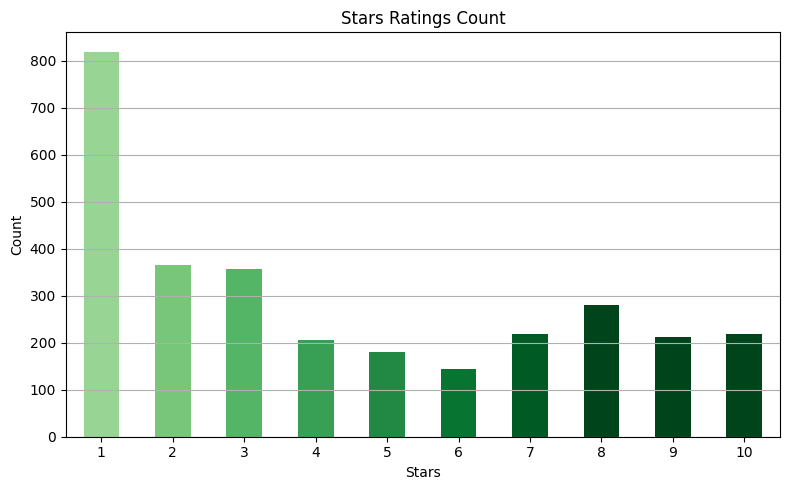

In [29]:
stars_counts = df['stars'].value_counts().sort_index()
# Define a colormap
cmap = plt.cm.viridis  # You can choose other colormaps like 'plasma', 'cividis', etc.
colors = [cmap(i / len(stars_counts)) for i in range(len(stars_counts))]  # Get colors from colormap

# Plotting the bar chart with increasing color intensity
plt.figure(figsize=(8, 5))
stars_counts = df['stars'].value_counts().sort_index()

# Define the green colormap
cmap = plt.cm.Greens  # Using the Greens colormap

# Adjusting the colors to increase visibility
colors = [cmap(0.4 + (0.8 * i / (len(stars_counts) - 1))) for i in range(len(stars_counts))]

# Plotting the bar chart with increasing color intensity
plt.figure(figsize=(8, 5))
stars_counts.plot(kind='bar', color=colors)

# Customize the plot
plt.title('Stars Ratings Count')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add grid lines for better readability

# Show the plot
plt.tight_layout()
plt.show()